### 数据更新

In [1]:
import requests
import pandas as pd

# # 免费版每分钟 5 次请求，日限 500 次
# url = "https://www.alphavantage.co/query"
# params = {
#     "function": "TIME_SERIES_DAILY",
#     "symbol": "XAUUSD",
#     "apikey": "49YTCP161D5RQDP5",  # 免费API Key需注册
#     "outputsize": "full"  # 获取全部历史数据
# }
# response = requests.get(url, params=params).json()
# data = pd.DataFrame(response["Time Series (Daily)"]).T
# data = data.astype(float)
# data.to_csv("data/XAUUSD_daily.csv")
# print(data.head())

In [2]:
import akshare as ak

# 获取 Au99.99 的历史行情
hist_data = ak.spot_hist_sge(symbol="Au99.99")
hist_data.to_csv("data/Au99.99_daily.csv", index=False)

### 绘制图表

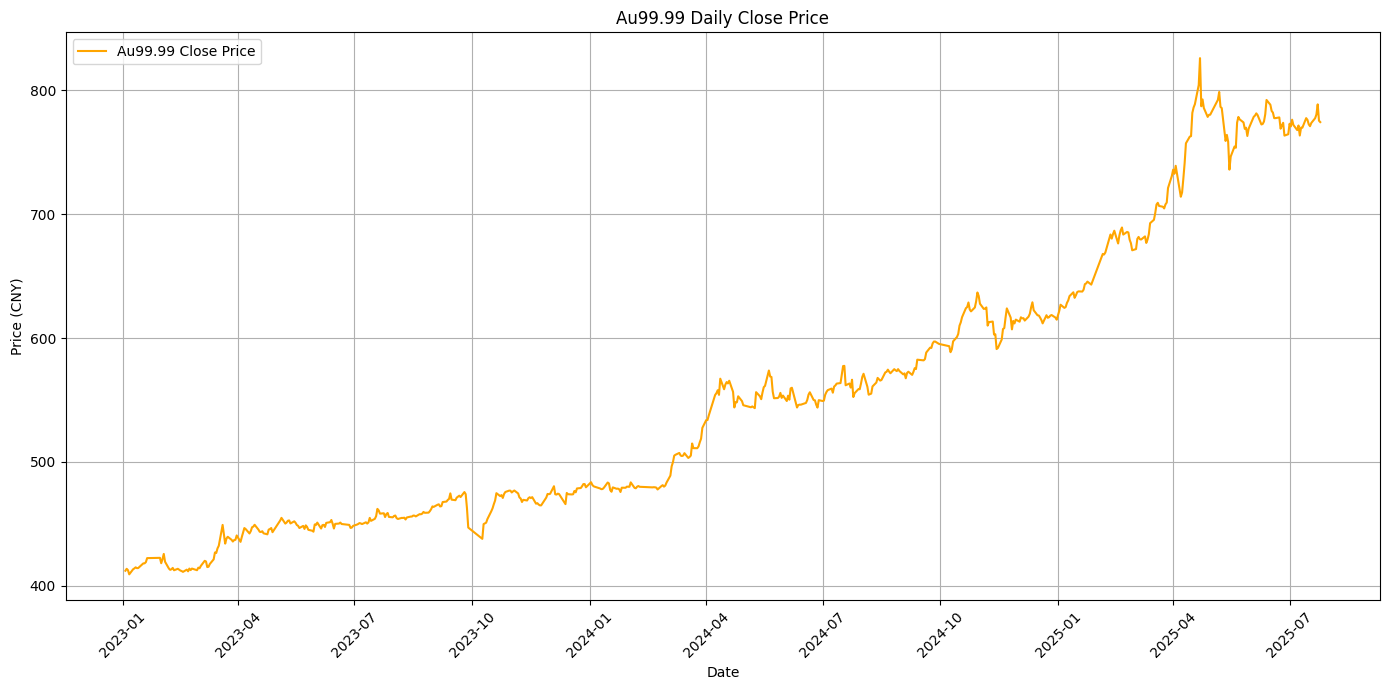

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("data/Au99.99_daily.csv")
data["date"] = pd.to_datetime(data["date"], format="%Y-%m-%d")
data = data[data['date'] >= pd.to_datetime("2023-01-01")]

plt.figure(figsize=(14, 7))
plt.plot(data["date"], data["close"], label="Au99.99 Close Price", color='orange')
plt.title("Au99.99 Daily Close Price")
plt.xlabel("Date")
plt.ylabel("Price (CNY)")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("output/Au99.99_daily_plot.png", dpi=300)
plt.show()

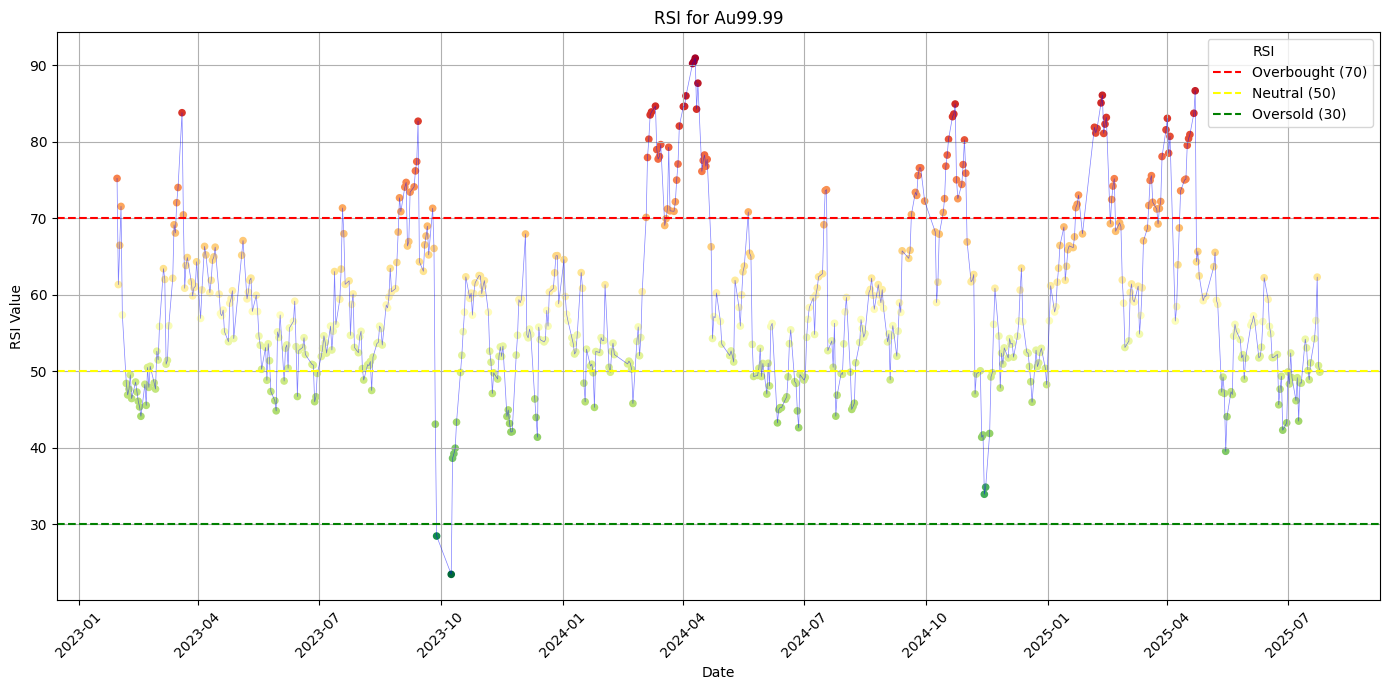

In [4]:
from src.calculate_rsi import calculate_rsi

data["rsi"] = calculate_rsi(data["close"].tolist(), window=14)

plt.figure(figsize=(14, 7))
scatter = plt.scatter(data["date"], data["rsi"], c=data["rsi"], cmap='RdYlGn_r', s=20, label="RSI")
plt.plot(data["date"], data["rsi"], color='blue', alpha=0.5, linewidth=0.5)
# plt.colorbar(scatter, label='RSI Value')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(50, color='yellow', linestyle='--', label='Neutral (50)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title("RSI for Au99.99")
plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("output/Au99.99_rsi_plot.png", dpi=300)
plt.show()